This notebook shows the visualizations of different calendars that can be generated with switchback splitters

In [1]:
from ab_lab import PowerAnalysis
import pandas as pd
import numpy as np
from plotnine import ggplot, geom_tile, element_text, element_blank, theme, labs, facet_wrap, aes, theme_set, theme_minimal
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

theme_set(theme_minimal())

In [2]:
def plot_calendar(splitter, df, calendar_name):
    treatments = splitter.assign_treatment_df(df)
    
    treatment_df = (
        treatments
        .loc[:, ["city", "treatment", "time"]]
        .drop_duplicates()
    )
    # Convert time column to datetime format and extract week and day
    treatment_df['time'] = pd.to_datetime(treatment_df['time'])
    treatment_df['week'] = treatment_df['time'].dt.isocalendar().week.astype(str)
    treatment_df['day'] = treatment_df['time'].dt.dayofweek.astype(str)
    # day of week with format number + name
    treatment_df['day_of_week'] = treatment_df['day'] + ' - ' + treatment_df['time'].dt.day_name()

    return (ggplot(treatment_df, aes(x='day_of_week', y='week', fill='treatment'))
            + geom_tile()
            + facet_wrap('city', nrow=2)
            + labs(title=f'Switchback calendar in different cities, using {calendar_name}', x='Day', y='Week')
            + theme(axis_text_x=element_text(angle=90, vjust=1.0),
                    axis_text_y=element_text(size=8),
                    strip_background=element_blank(),
                    strip_text=element_text(size=10)))


        

In [3]:
# Define data with random dates
df_raw = pd.DataFrame(
    {   
        "time": pd.date_range("2021-03-01", "2021-03-15", freq="1min")[
            np.random.randint(14 * 24 * 60, size=14 * 24 * 60)
        ],
        "y": np.random.randn(14 * 24 * 60),
    }
).assign(
    day_of_week=lambda df: df.time.dt.dayofweek,
    hour_of_day=lambda df: df.time.dt.hour,
    week=lambda df: df.time.dt.isocalendar().week,
)
df = pd.concat([df_raw.assign(city=city) for city in ("TGN", "NYC", "LON", "REU")])

In [4]:
# We have data of 2-weeks in 4 cities
df.head()

,time,y,day_of_week,hour_of_day,week,city
0,2021-03-11 23:15:00,0.827658,3,23,10,TGN
1,2021-03-01 14:20:00,0.843550,0,14,9,TGN
2,2021-03-04 17:50:00,0.306790,3,17,9,TGN
3,2021-03-09 07:24:00,-2.133119,1,7,10,TGN
4,2021-03-08 20:04:00,-1.026710,0,20,10,TGN


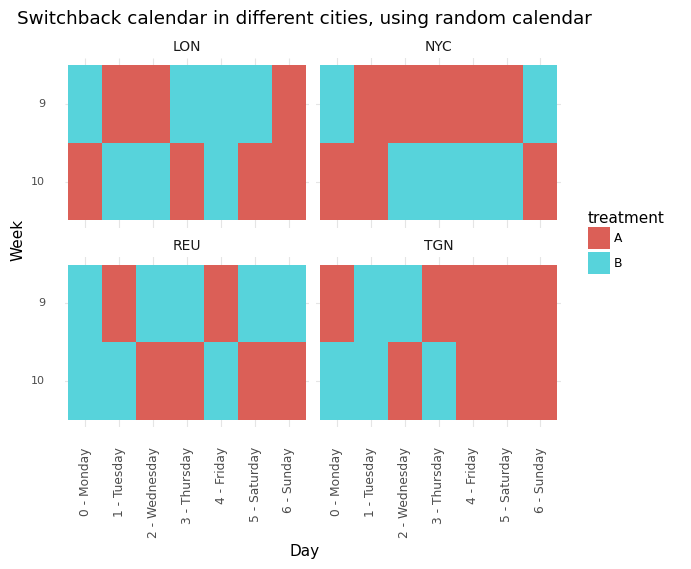

<ggplot: (310936046)>

In [5]:
# Completely random calendar
config = {
    "time_col": "time",
    "switch_frequency": "1d",
    "perturbator": "constant",
    "analysis": "ols_clustered",
    "splitter": "switchback",
    "cluster_cols": ["time", "city"],
    "target_col": "y",
}

power = PowerAnalysis.from_dict(config)

plot_calendar(power.splitter, df, "random calendar")

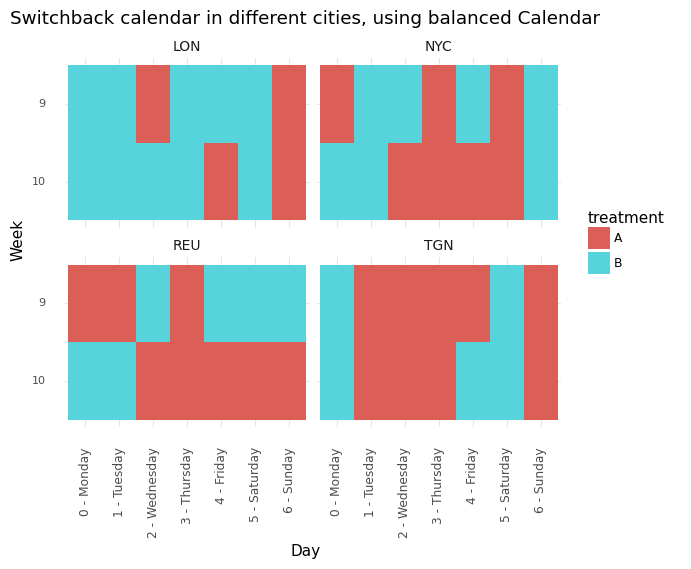

<ggplot: (311115590)>

In [6]:
# Balanced calendar
config = {
    "time_col": "time",
    "switch_frequency": "1d",
    "perturbator": "constant",
    "analysis": "ols_clustered",
    "splitter": "switchback_balance",
    "cluster_cols": ["time", "city"],
    "target_col": "y",
}

power = PowerAnalysis.from_dict(config)

plot_calendar(power.splitter, df, "balanced Calendar")

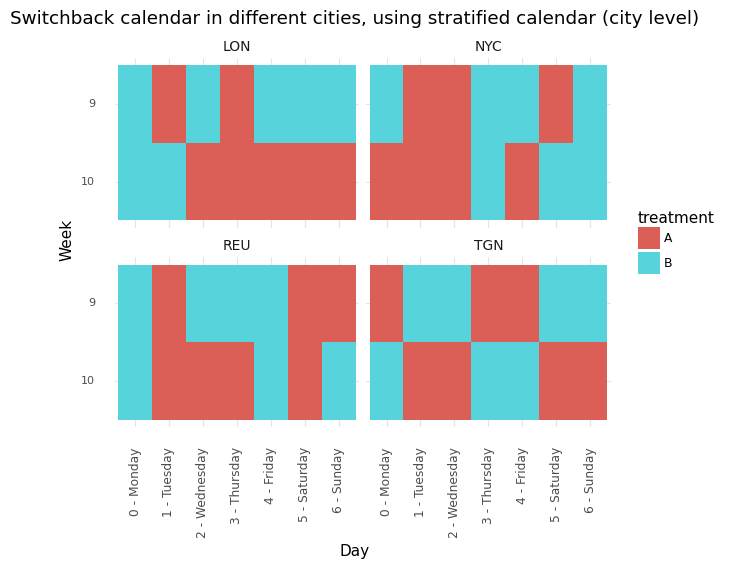

<ggplot: (311223354)>

In [7]:
# Stratified - city level
config = {
    "time_col": "time",
    "switch_frequency": "1d",
    "perturbator": "constant",
    "analysis": "ols_clustered",
    "splitter": "switchback_stratified",
    "cluster_cols": ["time", "city"],
    "strata_cols": ["city"],
    "target_col": "y",
}

power = PowerAnalysis.from_dict(config)

plot_calendar(power.splitter, df, "stratified calendar (city level)")

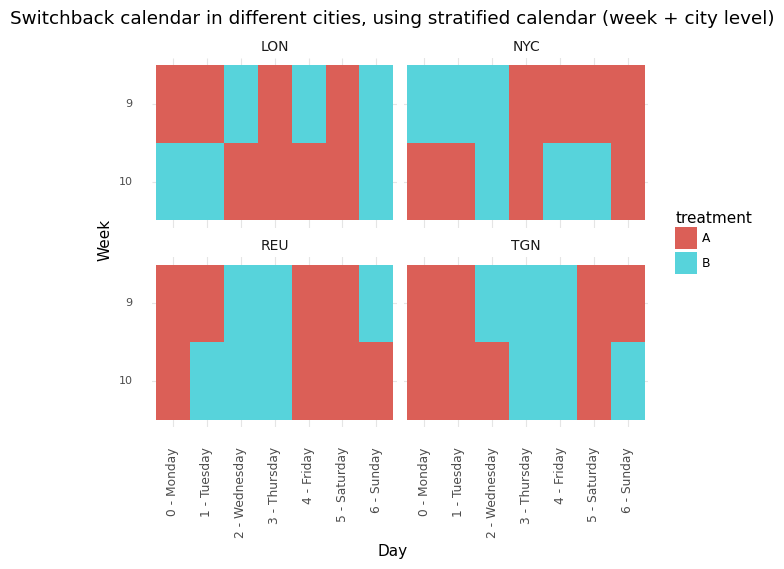

<ggplot: (311217083)>

In [8]:
# Stratified - city + week level
config = {
    "time_col": "time",
    "switch_frequency": "1d",
    "perturbator": "constant",
    "analysis": "ols_clustered",
    "splitter": "switchback_stratified",
    "cluster_cols": ["time", "city"],
    "strata_cols": ["week", "city"],
    "target_col": "y",
}

power = PowerAnalysis.from_dict(config)

plot_calendar(power.splitter, df, "stratified calendar (week + city level)")

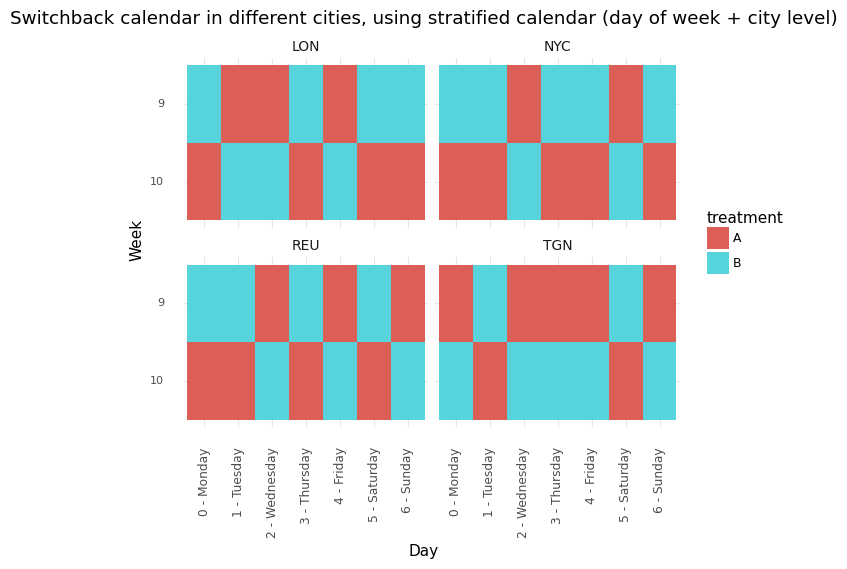

<ggplot: (311416839)>

In [9]:
# Stratified - city + day of week level
config = {
    "time_col": "time",
    "switch_frequency": "1d",
    "perturbator": "constant",
    "analysis": "ols_clustered",
    "splitter": "switchback_stratified",
    "cluster_cols": ["time", "city"],
    "strata_cols": ["day_of_week", "city"],
    "target_col": "y",
}

power = PowerAnalysis.from_dict(config)

plot_calendar(power.splitter, df, "stratified calendar (day of week + city level)")